# Implementing a Neural Network
In this exercise we will develop a neural network with fully-connected layers to perform classification, and test it out on the CIFAR-10 dataset.

In [2]:
# A bit of setup

import numpy as np
import matplotlib.pyplot as plt

from cs231n.classifiers.neural_net import TwoLayerNet

from __future__ import print_function

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

def rel_error(x, y):
    """ returns relative error """
    return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


We will use the class `TwoLayerNet` in the file `cs231n/classifiers/neural_net.py` to represent instances of our network. The network parameters are stored in the instance variable `self.params` where keys are string parameter names and values are numpy arrays. Below, we initialize toy data and a toy model that we will use to develop your implementation.

In [4]:
# Create a small net and some toy data to check your implementations.
# Note that we set the random seed for repeatable experiments.

input_size = 4
hidden_size = 10
num_classes = 3
num_inputs = 5

def init_toy_model():
    np.random.seed(0)
    return TwoLayerNet(input_size, hidden_size, num_classes, std=1e-1)

def init_toy_data():
    np.random.seed(1)
    X = 10 * np.random.randn(num_inputs, input_size)
    y = np.array([0, 1, 2, 2, 1])
    return X, y

net = init_toy_model()
X, y = init_toy_data()

# Forward pass: compute scores
Open the file `cs231n/classifiers/neural_net.py` and look at the method `TwoLayerNet.loss`. This function is very similar to the loss functions you have written for the SVM and Softmax exercises: It takes the data and weights and computes the class scores, the loss, and the gradients on the parameters. 

Implement the first part of the forward pass which uses the weights and biases to compute the scores for all inputs.

In [5]:
scores = net.loss(X)
print('Your scores:')
print(scores)
print()
print('correct scores:')
correct_scores = np.asarray([
  [-0.81233741, -1.27654624, -0.70335995],
  [-0.17129677, -1.18803311, -0.47310444],
  [-0.51590475, -1.01354314, -0.8504215 ],
  [-0.15419291, -0.48629638, -0.52901952],
  [-0.00618733, -0.12435261, -0.15226949]])
print(correct_scores)

# The difference should be very small. We get < 1e-7
print('Difference between your scores and correct scores:')
print(np.sum(np.abs(scores - correct_scores)))

Your scores:
[[-0.81233741 -1.27654624 -0.70335995]
 [-0.17129677 -1.18803311 -0.47310444]
 [-0.51590475 -1.01354314 -0.8504215 ]
 [-0.15419291 -0.48629638 -0.52901952]
 [-0.00618733 -0.12435261 -0.15226949]]

correct scores:
[[-0.81233741 -1.27654624 -0.70335995]
 [-0.17129677 -1.18803311 -0.47310444]
 [-0.51590475 -1.01354314 -0.8504215 ]
 [-0.15419291 -0.48629638 -0.52901952]
 [-0.00618733 -0.12435261 -0.15226949]]
Difference between your scores and correct scores:
3.6802720496109664e-08


# Forward pass: compute loss
In the same function, implement the second part that computes the data and regularizaion loss.

In [6]:
loss, _ = net.loss(X, y, reg=0.05)
correct_loss = 1.30378789133

# should be very small, we get < 1e-12
print('Difference between your loss and correct loss:')
print(np.sum(np.abs(loss - correct_loss)))

Difference between your loss and correct loss:
1.7985612998927536e-13


# Backward pass
Implement the rest of the function. This will compute the gradient of the loss with respect to the variables `W1`, `b1`, `W2`, and `b2`. Now that you (hopefully!) have a correctly implemented forward pass, you can debug your backward pass using a numeric gradient check:

In [7]:
from cs231n.gradient_check import eval_numerical_gradient

# Use numeric gradient checking to check your implementation of the backward pass.
# If your implementation is correct, the difference between the numeric and
# analytic gradients should be less than 1e-8 for each of W1, W2, b1, and b2.

loss, grads = net.loss(X, y, reg=0.05)

# these should all be less than 1e-8 or so
for param_name in grads:
    f = lambda W: net.loss(X, y, reg=0.05)[0]
    param_grad_num = eval_numerical_gradient(f, net.params[param_name], verbose=False)
    print('%s max relative error: %e' % (param_name, rel_error(param_grad_num, grads[param_name])))

W2 max relative error: 3.440708e-09
b2 max relative error: 4.447625e-11
W1 max relative error: 3.561318e-09
b1 max relative error: 2.738421e-09


# Train the network
To train the network we will use stochastic gradient descent (SGD), similar to the SVM and Softmax classifiers. Look at the function `TwoLayerNet.train` and fill in the missing sections to implement the training procedure. This should be very similar to the training procedure you used for the SVM and Softmax classifiers. You will also have to implement `TwoLayerNet.predict`, as the training process periodically performs prediction to keep track of accuracy over time while the network trains.

Once you have implemented the method, run the code below to train a two-layer network on toy data. You should achieve a training loss less than 0.2.

Final training loss:  0.01714960793873215


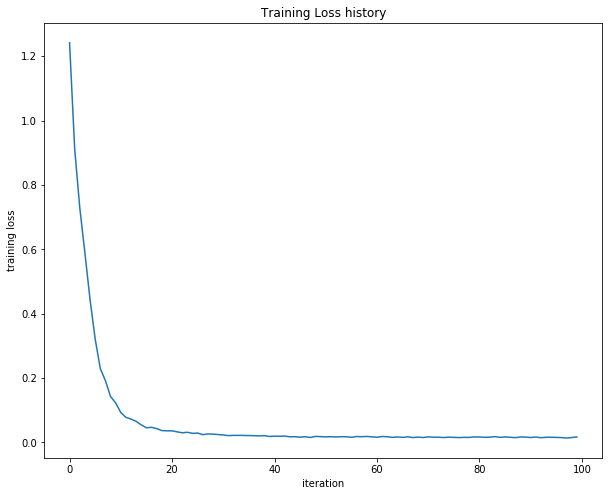

In [8]:
net = init_toy_model()
stats = net.train(X, y, X, y,
            learning_rate=1e-1, reg=5e-6,
            num_iters=100, verbose=False)

print('Final training loss: ', stats['loss_history'][-1])

# plot the loss history
plt.plot(stats['loss_history'])
plt.xlabel('iteration')
plt.ylabel('training loss')
plt.title('Training Loss history')
plt.show()

# Load the data
Now that you have implemented a two-layer network that passes gradient checks and works on toy data, it's time to load up our favorite CIFAR-10 data so we can use it to train a classifier on a real dataset.

In [190]:
from cs231n.data_utils import load_CIFAR10

def get_CIFAR10_data(num_training=49000, num_validation=1000, num_test=1000):
    """
    Load the CIFAR-10 dataset from disk and perform preprocessing to prepare
    it for the two-layer neural net classifier. These are the same steps as
    we used for the SVM, but condensed to a single function.  
    """
    # Load the raw CIFAR-10 data
    cifar10_dir = 'cs231n/datasets/cifar-10-batches-py'
    X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)
        
    # Subsample the data
    mask = list(range(num_training, num_training + num_validation))
    X_val = X_train[mask]
    y_val = y_train[mask]
    mask = list(range(num_training))
    X_train = X_train[mask]
    y_train = y_train[mask]
    mask = list(range(num_test))
    X_test = X_test[mask]
    y_test = y_test[mask]

    # Normalize the data: subtract the mean image
    mean_image = np.mean(X_train, axis=0)
    X_train -= mean_image
    X_val -= mean_image
    X_test -= mean_image

    # Reshape data to rows
    X_train = X_train.reshape(num_training, -1)
    X_val = X_val.reshape(num_validation, -1)
    X_test = X_test.reshape(num_test, -1)

    return X_train, y_train, X_val, y_val, X_test, y_test


# Invoke the above function to get our data.
X_train, y_train, X_val, y_val, X_test, y_test = get_CIFAR10_data()
print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Train data shape:  (49000, 3072)
Train labels shape:  (49000,)
Validation data shape:  (1000, 3072)
Validation labels shape:  (1000,)
Test data shape:  (1000, 3072)
Test labels shape:  (1000,)


# Train a network
To train our network we will use SGD with momentum. In addition, we will adjust the learning rate with an exponential learning rate schedule as optimization proceeds; after each epoch, we will reduce the learning rate by multiplying it by a decay rate.

In [99]:
input_size = 32 * 32 * 3
hidden_size = 50
lr = 1e-4
num_classes = 10
net = TwoLayerNet(input_size, hidden_size, num_classes)

# Train the network
stats = net.train(X_train, y_train, X_val, y_val,
            num_iters=1000, batch_size=200,
            learning_rate=lr, learning_rate_decay=0.95,
            reg=0.25, verbose=True)

# Predict on the validation set
val_acc = (net.predict(X_val) == y_val).mean()
print('Validation accuracy: ', val_acc)



iteration 0 / 1000: loss 2.302962
iteration 100 / 1000: loss 2.302455
iteration 200 / 1000: loss 2.296187
iteration 300 / 1000: loss 2.265526
iteration 400 / 1000: loss 2.176002
iteration 500 / 1000: loss 2.148930
iteration 600 / 1000: loss 2.104363
iteration 700 / 1000: loss 2.073008
iteration 800 / 1000: loss 2.048076
iteration 900 / 1000: loss 1.967948
Validation accuracy:  0.28


# Debug the training
With the default parameters we provided above, you should get a validation accuracy of about 0.29 on the validation set. This isn't very good.

One strategy for getting insight into what's wrong is to plot the loss function and the accuracies on the training and validation sets during optimization.

Another strategy is to visualize the weights that were learned in the first layer of the network. In most neural networks trained on visual data, the first layer weights typically show some visible structure when visualized.

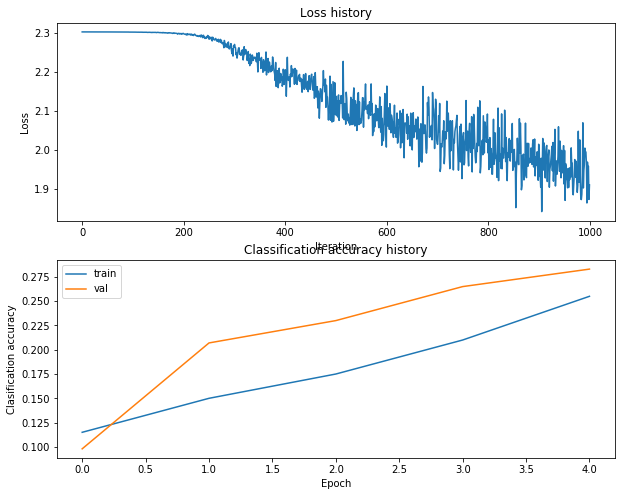

In [36]:
# Plot the loss function and train / validation accuracies
plt.subplot(2, 1, 1)
plt.plot(stats['loss_history'])
plt.title('Loss history')
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.subplot(2, 1, 2)
plt.plot(stats['train_acc_history'], label='train')
plt.plot(stats['val_acc_history'], label='val')
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Clasification accuracy')
plt.legend(loc="best")
plt.show()


[0.085]

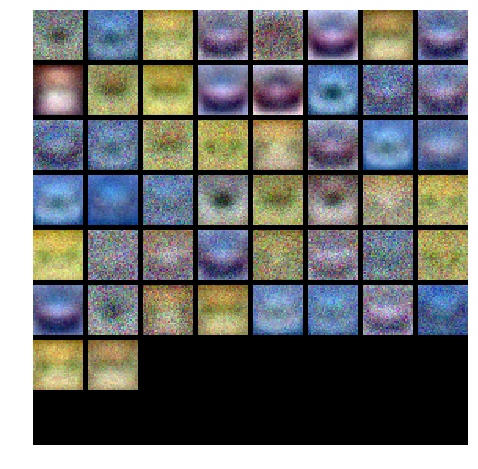

In [37]:
from cs231n.vis_utils import visualize_grid

# Visualize the weights of the network

def show_net_weights(net):
    W1 = net.params['W1']
    W1 = W1.reshape(32, 32, 3, -1).transpose(3, 0, 1, 2)
    plt.imshow(visualize_grid(W1, padding=3).astype('uint8'))
    plt.gca().axis('off')
    plt.show()

show_net_weights(net)

# Tune your hyperparameters

**What's wrong?**. Looking at the visualizations above, we see that the loss is decreasing more or less linearly, which seems to suggest that the learning rate may be too low. Moreover, there is no gap between the training and validation accuracy, suggesting that the model we used has low capacity, and that we should increase its size. On the other hand, with a very large model we would expect to see more overfitting, which would manifest itself as a very large gap between the training and validation accuracy.

**Tuning**. Tuning the hyperparameters and developing intuition for how they affect the final performance is a large part of using Neural Networks, so we want you to get a lot of practice. Below, you should experiment with different values of the various hyperparameters, including hidden layer size, learning rate, numer of training epochs, and regularization strength. You might also consider tuning the learning rate decay, but you should be able to get good performance using the default value.

**Approximate results**. You should be aim to achieve a classification accuracy of greater than 48% on the validation set. Our best network gets over 52% on the validation set.

**Experiment**: You goal in this exercise is to get as good of a result on CIFAR-10 as you can, with a fully-connected Neural Network. For every 1% above 52% on the Test set we will award you with one extra bonus point. Feel free implement your own techniques (e.g. PCA to reduce dimensionality, or adding dropout, or adding features to the solver, etc.).

# Things to Try Based on the Previous Text
- Learning rate (might be too low)
- model low capacity (increase hidden layer size) -> this brings over fitting - high error on the validation set
- Number of training epochs (iterations)
- Regularization strenght

Further Things to try

- Adding drop out
- Using lr_technique described by the paper 


In [113]:
## First Try Param Grid (Bruteforce)


#################################################################################
# TODO: Tune hyperparameters using the validation set. Store your best trained  #
# model in best_net.                                                            #
#                                                                               #
# To help debug your network, it may help to use visualizations similar to the  #
# ones we used above; these visualizations will have significant qualitative    #
# differences from the ones we saw above for the poorly tuned network.          #
#                                                                               #
# Tweaking hyperparameters by hand can be fun, but you might find it useful to  #
# write code to sweep through possible combinations of hyperparameters          #
# automatically like we did on the previous exercises.                          #
#################################################################################

from sklearn.model_selection import ParameterGrid

input_size = 32 * 32 * 3

lr = 1e-4
num_classes = 10
net = TwoLayerNet(input_size, hidden_size, num_classes)

params = {
        'hidden_size':[100, 150, 200],
        'reg': np.logspace(-0.6, 0.5, 3),
        'num_iters': np.linspace(500, 5000, 3).astype(int),
        'batch_size': np.linspace(200, 500, 3).astype(int),
        'learning_rate': np.logspace(-4, -2, 5),
        'learning_rate_decay': [0.95],
        'verbose': [False],
        'X': [X_train],
        'y': [y_train],
        'X_val': [X_val],
        'y_val': [y_val]
        
    
}
grid = ParameterGrid(params)

log_params = []

best_net = None # store the best model into this 
best_val_acc = -9999
best_stats = None
best_params = {} 

for p in grid:
    hidden_size = p.pop('hidden_size')
    net = TwoLayerNet(input_size, hidden_size, num_classes)
    print(f"hs: {hidden_size} reg: {p['reg']} num_iters: {p['num_iters']} bs: {p['batch_size']} lr: {p['learning_rate']}")
    stats = net.train(**p)
    
    val_acc = (net.predict(X_val) == y_val).mean()
    print('Validation accuracy: ', val_acc)
    if val_acc > best_val_acc:
        best_net = net
        best_val_acc = val_acc
        best_stats = stats
        best_params = p
        print(f"***New Best Val Acc {val_acc}***")


#################################################################################
#                               END OF YOUR CODE                                #
#################################################################################

hs: 100 reg: 0.251188643150958 num_iters: 500 bs: 200 lr: 0.0001
Validation accuracy:  0.239
***New Best Val Acc 0.239***
hs: 100 reg: 0.8912509381337457 num_iters: 500 bs: 200 lr: 0.0001
Validation accuracy:  0.232
hs: 100 reg: 3.1622776601683795 num_iters: 500 bs: 200 lr: 0.0001
Validation accuracy:  0.234
hs: 100 reg: 0.251188643150958 num_iters: 2750 bs: 200 lr: 0.0001
Validation accuracy:  0.396
***New Best Val Acc 0.396***
hs: 100 reg: 0.8912509381337457 num_iters: 2750 bs: 200 lr: 0.0001
Validation accuracy:  0.379
hs: 100 reg: 3.1622776601683795 num_iters: 2750 bs: 200 lr: 0.0001
Validation accuracy:  0.373
hs: 100 reg: 0.251188643150958 num_iters: 5000 bs: 200 lr: 0.0001
Validation accuracy:  0.431
***New Best Val Acc 0.431***
hs: 100 reg: 0.8912509381337457 num_iters: 5000 bs: 200 lr: 0.0001
Validation accuracy:  0.433
***New Best Val Acc 0.433***
hs: 100 reg: 3.1622776601683795 num_iters: 5000 bs: 200 lr: 0.0001
Validation accuracy:  0.394
hs: 100 reg: 0.251188643150958 num_

/Users/mcabrera/development_personal/fastai/deeplearning_classes/assignment1/cs231n/classifiers/neural_net.py:73: RuntimeWarning: overflow encountered in subtract
  scores_matrix_norm = scores_matrix - np.max(scores_matrix, axis=1)[:, np.newaxis]  # NxC
/Users/mcabrera/development_personal/fastai/deeplearning_classes/assignment1/cs231n/classifiers/neural_net.py:69: RuntimeWarning: invalid value encountered in subtract
  loss_vect = np.log(np.exp(scores_matrix).sum(axis=1)) - correct_scores_matrix  # (N, ) loss per sample
/Users/mcabrera/development_personal/fastai/deeplearning_classes/assignment1/cs231n/classifiers/neural_net.py:73: RuntimeWarning: invalid value encountered in subtract
  scores_matrix_norm = scores_matrix - np.max(scores_matrix, axis=1)[:, np.newaxis]  # NxC
/Users/mcabrera/development_personal/fastai/deeplearning_classes/assignment1/cs231n/classifiers/neural_net.py:129: RuntimeWarning: invalid value encountered in maximum
  return np.maximum(0, x)
/Users/mcabrera/anac

Validation accuracy:  0.087
hs: 100 reg: 0.8912509381337457 num_iters: 500 bs: 200 lr: 0.01
Validation accuracy:  0.087
hs: 100 reg: 3.1622776601683795 num_iters: 500 bs: 200 lr: 0.01
Validation accuracy:  0.087
hs: 100 reg: 0.251188643150958 num_iters: 2750 bs: 200 lr: 0.01
Validation accuracy:  0.087
hs: 100 reg: 0.8912509381337457 num_iters: 2750 bs: 200 lr: 0.01
Validation accuracy:  0.087
hs: 100 reg: 3.1622776601683795 num_iters: 2750 bs: 200 lr: 0.01
Validation accuracy:  0.087
hs: 100 reg: 0.251188643150958 num_iters: 5000 bs: 200 lr: 0.01
Validation accuracy:  0.087
hs: 100 reg: 0.8912509381337457 num_iters: 5000 bs: 200 lr: 0.01
Validation accuracy:  0.087
hs: 100 reg: 3.1622776601683795 num_iters: 5000 bs: 200 lr: 0.01
Validation accuracy:  0.087
hs: 150 reg: 0.251188643150958 num_iters: 500 bs: 200 lr: 0.0001
Validation accuracy:  0.238
hs: 150 reg: 0.8912509381337457 num_iters: 500 bs: 200 lr: 0.0001
Validation accuracy:  0.239
hs: 150 reg: 3.1622776601683795 num_iters: 50

KeyboardInterrupt: 

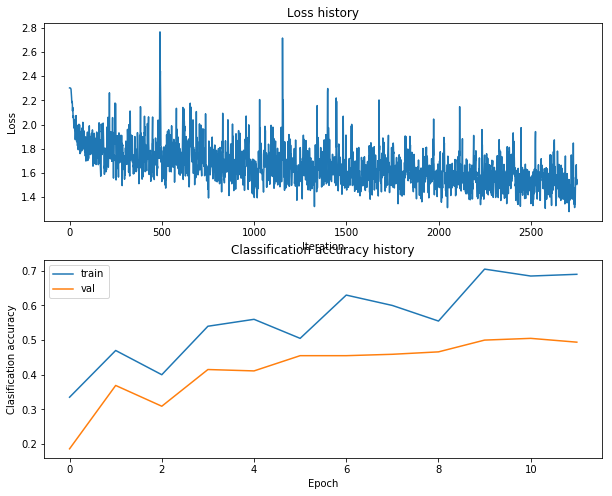

In [115]:
stats = best_stats
# Plot the loss function and train / validation accuracies
plt.subplot(2, 1, 1)
plt.plot(stats['loss_history'])
plt.title('Loss history')
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.subplot(2, 1, 2)
plt.plot(stats['train_acc_history'], label='train')
plt.plot(stats['val_acc_history'], label='val')
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Clasification accuracy')
plt.legend(loc="best")
plt.show()

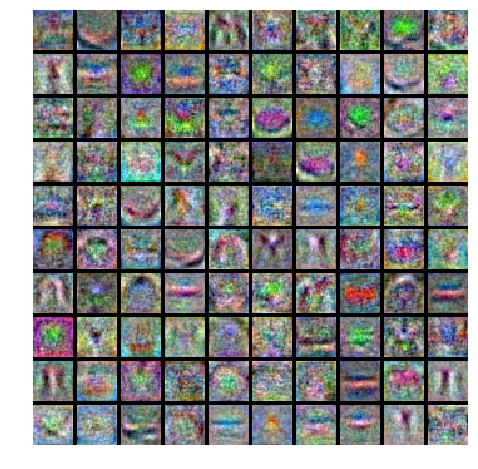

In [117]:
# visualize the weights of the best network
show_net_weights(best_net)

# Run on the test set
When you are done experimenting, you should evaluate your final trained network on the test set; you should get above 48%.

**We will give you extra bonus point for every 1% of accuracy above 52%.**

In [118]:
test_acc = (best_net.predict(X_test) == y_test).mean()
print('Test accuracy: ', test_acc)

Test accuracy:  0.513


# Question: Can we get a better performance (or at least faster convergence) with this vanilla net using Hyperopt?


In [372]:
from functools import partial
from cs231n.classifiers.neural_net import TwoLayerNet


def net_accuracy(X, y, X_val, y_val, hidden_size, learning_rate, reg, num_iters, batch_size, p_dropout=None):
    net = TwoLayerNet(input_size, hidden_size, num_classes)
    
    stats = net.train(X, y, X_val, y_val, learning_rate=learning_rate, learning_rate_decay=0.95,
              reg=reg, num_iters=num_iters,
              batch_size=batch_size, verbose=False, p_dropout=p_dropout)
    
    val_acc = (net.predict(X_val) == y_val).mean()
    return -val_acc


objective_p = partial(net_accuracy, X_train, y_train, X_val, y_val)
def objective(params):
    neg_acc = objective_p(**params)
    params['acc'] = -neg_acc
    return neg_acc

In [214]:
import numpy as np
from hyperopt import hp, tpe, fmin
space = {}

space['hidden_size']  = 50 + hp.randint('hidden_size', 200)
space['learning_rate'] =  hp.loguniform('learning_rate', -4*np.log(10), -2*np.log(10))
space['reg'] =  hp.loguniform('reg', -0.6*np.log(10), 0.6*np.log(10))
space['num_iters'] = 500 +  hp.randint('num_iters', 4500)
space['batch_size'] = 50 +  hp.randint('batch_size', 350)



In [215]:
from hyperopt import fmin, tpe, Trials, space_eval

# The Trials object will store details of each iteration
trials = Trials()

# Run the hyperparameter search using the tpe algorithm
best = fmin(objective,
            space,
            algo=tpe.suggest,
            max_evals=100,
            trials=trials)

## Using 100 trials I could obtaina a paramter combination that yields 0.53 accuracy on the evaluation set
Using 1000 trials and the vanilla neural net I was able to use 0.53 acc in the evaluation set. Let's see how that's peform on the test set. Compareed to 0.518 from the grid search, it is still marginal but better nonetheless.

    

In [228]:
print(trials.best_trial['result'])


{'loss': -0.53, 'status': 'ok'}


In [243]:
best_hps = space_eval(space, best)
print(best_hps)

{'batch_size': 166, 'hidden_size': 234, 'learning_rate': 0.0010534957373191703, 'num_iters': 4624, 'reg': 0.294708435275235}


In [244]:
best_net_hopt = TwoLayerNet(input_size, best_hps['hidden_size'], num_classes)
stats_hps = best_net_hopt.train(X_train, y_train, X_val, y_val, learning_rate=best_hps['learning_rate'],learning_rate_decay=0.95,
              reg=best_hps['reg'], num_iters=best_hps['num_iters'],
              batch_size=best_hps['batch_size'], verbose=True)


iteration 0 / 4624: loss 2.304755
iteration 100 / 4624: loss 1.940881
iteration 200 / 4624: loss 1.687239
iteration 300 / 4624: loss 1.505716
iteration 400 / 4624: loss 1.744756
iteration 500 / 4624: loss 1.690996
iteration 600 / 4624: loss 1.413431
iteration 700 / 4624: loss 1.515580
iteration 800 / 4624: loss 1.507473
iteration 900 / 4624: loss 1.447081
iteration 1000 / 4624: loss 1.564869
iteration 1100 / 4624: loss 1.545613
iteration 1200 / 4624: loss 1.489320
iteration 1300 / 4624: loss 1.436693
iteration 1400 / 4624: loss 1.548438
iteration 1500 / 4624: loss 1.418314
iteration 1600 / 4624: loss 1.506404
iteration 1700 / 4624: loss 1.591398
iteration 1800 / 4624: loss 1.405138
iteration 1900 / 4624: loss 1.356114
iteration 2000 / 4624: loss 1.439620
iteration 2100 / 4624: loss 1.618753
iteration 2200 / 4624: loss 1.348035
iteration 2300 / 4624: loss 1.423792
iteration 2400 / 4624: loss 1.286806
iteration 2500 / 4624: loss 1.415278
iteration 2600 / 4624: loss 1.504889
iteration 270

In [246]:
test_acc = (best_net_hopt.predict(X_test) == y_test).mean()
print('Test accuracy: ', test_acc)

Test accuracy:  0.517


## Increase on Test Accuracy from 0.513 to 0.517
Using Hyperopt I got a marginal increase on the test accuracy. 

# Neural Net with Dropout
At this stage I have changed the code to use droput as further regularization. Let's see how it performs with the best parameters

In [248]:
params_drop = best_hps.copy()
params_drop['p_dropout'] = 0.5

In [249]:
objective_p(**params_drop)

With the best parameters with see it peforms 0.462 so we see, we want to to fit again the model and see if we can at least match and improve the performance of the previous model.


In [259]:
import numpy as np
from hyperopt import hp, tpe, fmin
space = {}

space['hidden_size']  = 50 + hp.randint('hidden_size', 200)
space['learning_rate'] =  hp.loguniform('learning_rate', -4*np.log(10), -2*np.log(10))
space['reg'] =  hp.loguniform('reg', -0.6*np.log(10), 0.6*np.log(10))
space['num_iters'] = 500 +  hp.randint('num_iters', 4500)
space['batch_size'] = 50 +  hp.randint('batch_size', 350)
space['p_dropout'] =  hp.normal('p_dropout', 0.5, 0.05S)

In [262]:
from hyperopt import fmin, tpe, Trials, space_eval

# The Trials object will store details of each iteration
trials = Trials()

# Run the hyperparameter search using the tpe algorithm
best_ho_drop = fmin(objective,
            space,
            algo=tpe.suggest,
            max_evals=500,
            trials=trials)

In [273]:
best_vals_drop = trials.best_trial['misc']['vals'].copy()
best_vals_drop = {x:best_vals_drop[x][0] for x in best_vals_drop}

In [275]:
best_vals_drop

{'batch_size': 341,
 'hidden_size': 165,
 'learning_rate': 0.0004892025510421948,
 'num_iters': 4268,
 'p_dropout': 1.0022158962418577,
 'reg': 0.4121247241034824}

In [286]:
best_net_hopt = TwoLayerNet(input_size, best_vals_drop['hidden_size'], num_classes, p_dropout=None)
stats_hps_dp = best_net_hopt.train(X_train, y_train, X_val, y_val, learning_rate=best_vals_drop['learning_rate'],learning_rate_decay=0.95,
              reg=best_vals_drop['reg'], num_iters=10000,
              batch_size=best_vals_drop['batch_size'], verbose=True)

iteration 0 / 10000: loss 2.304686
iteration 100 / 10000: loss 2.092473
iteration 200 / 10000: loss 1.980105
iteration 300 / 10000: loss 1.843797
iteration 400 / 10000: loss 1.780492
iteration 500 / 10000: loss 1.727824
iteration 600 / 10000: loss 1.657561
iteration 700 / 10000: loss 1.647011
iteration 800 / 10000: loss 1.691613
iteration 900 / 10000: loss 1.558403
iteration 1000 / 10000: loss 1.782920
iteration 1100 / 10000: loss 1.559616
iteration 1200 / 10000: loss 1.590480
iteration 1300 / 10000: loss 1.486137
iteration 1400 / 10000: loss 1.458845
iteration 1500 / 10000: loss 1.461468
iteration 1600 / 10000: loss 1.540822
iteration 1700 / 10000: loss 1.484967
iteration 1800 / 10000: loss 1.498595
iteration 1900 / 10000: loss 1.441402
iteration 2000 / 10000: loss 1.525470
iteration 2100 / 10000: loss 1.397828
iteration 2200 / 10000: loss 1.562592
iteration 2300 / 10000: loss 1.375971
iteration 2400 / 10000: loss 1.440995
iteration 2500 / 10000: loss 1.379388
iteration 2600 / 10000: 

In [288]:
test_acc = (best_net_hopt.predict(X_test) == y_test).mean()
print('Test accuracy: ', test_acc)

Test accuracy:  0.544


## Hyperopt Discards Dropout 

Weirdly enough this search yielded that dropout should be actually deactivated and end up with good better parameters (I got up to 0.544 on the testing set which is pretty good). In other words without Droput this networks performs better. Now I will force the network to use dropout somehow. Let's if forcing this will make it better.

In [314]:
import numpy as np
from hyperopt import hp, tpe, fmin
space = {}

space['hidden_size']  = 100 + hp.randint('hidden_size', 400)  # Increase representation power as droput regularizes 
space['learning_rate'] =  hp.loguniform('learning_rate', -3*np.log(10), -2*np.log(10))
space['reg'] =  hp.loguniform('reg', -0.9*np.log(10), 0.4*np.log(10)) # Smaller regularization as droput might account for that
space['num_iters'] =  2500 # Let's speed up by using less iterations
space['batch_size'] = 50 +  hp.randint('batch_size', 350)
space['p_dropout'] =  hp.normal('p_dropout', 0.5, 0.07) # Let's pick more numbers around 0.5

In [316]:
from hyperopt import fmin, tpe, Trials, space_eval

# The Trials object will store details of each iteration
trials = Trials()

# Run the hyperparameter search using the tpe algorithm
best_ho_drop = fmin(objective,
            space,
            algo=tpe.suggest,
            max_evals=100,
            trials=trials)

{'batch_size': 71, 'hidden_size': 174, 'learning_rate': 0.0012426823378550477, 'num_iters': 2500, 'p_dropout': 0.41882446361048664, 'reg': 0.4210271319836313}
{'batch_size': 213, 'hidden_size': 419, 'learning_rate': 0.002853915194255935, 'num_iters': 2500, 'p_dropout': 0.4833247151293149, 'reg': 0.5049790345875764}
{'batch_size': 310, 'hidden_size': 336, 'learning_rate': 0.005189536407670843, 'num_iters': 2500, 'p_dropout': 0.5175300914527536, 'reg': 0.49809995116914446}
{'batch_size': 231, 'hidden_size': 239, 'learning_rate': 0.009008289266319486, 'num_iters': 2500, 'p_dropout': 0.4605646305759856, 'reg': 0.44181189122869624}


/Users/mcabrera/development_personal/fastai/deeplearning_classes/assignment1/cs231n/classifiers/neural_net.py:74: RuntimeWarning: overflow encountered in subtract
  scores_matrix_norm = scores_matrix - np.max(scores_matrix, axis=1)[:, np.newaxis]  # NxC
/Users/mcabrera/development_personal/fastai/deeplearning_classes/assignment1/cs231n/classifiers/neural_net.py:74: RuntimeWarning: invalid value encountered in subtract
  scores_matrix_norm = scores_matrix - np.max(scores_matrix, axis=1)[:, np.newaxis]  # NxC
/Users/mcabrera/development_personal/fastai/deeplearning_classes/assignment1/cs231n/classifiers/neural_net.py:125: RuntimeWarning: invalid value encountered in maximum
  return np.maximum(0, x)
/Users/mcabrera/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/Users/mcabrera/development_personal/fastai/deeplearning_classes/assignment1/cs231n/classifiers/ne

{'batch_size': 288, 'hidden_size': 171, 'learning_rate': 0.0057529543116146735, 'num_iters': 2500, 'p_dropout': 0.5014614349804677, 'reg': 0.6725387058824082}
{'batch_size': 304, 'hidden_size': 467, 'learning_rate': 0.003127910115171637, 'num_iters': 2500, 'p_dropout': 0.5997501259773187, 'reg': 0.8269420768125355}
{'batch_size': 192, 'hidden_size': 400, 'learning_rate': 0.0030354092279376234, 'num_iters': 2500, 'p_dropout': 0.45650377274589066, 'reg': 0.4264203759143258}
{'batch_size': 257, 'hidden_size': 388, 'learning_rate': 0.00755474794083986, 'num_iters': 2500, 'p_dropout': 0.3976615666711091, 'reg': 2.2697496744305226}


/Users/mcabrera/development_personal/fastai/deeplearning_classes/assignment1/cs231n/classifiers/neural_net.py:70: RuntimeWarning: invalid value encountered in subtract
  loss_vect = np.log(np.exp(scores_matrix).sum(axis=1)) - correct_scores_matrix  # (N, ) loss per sample


{'batch_size': 263, 'hidden_size': 423, 'learning_rate': 0.0014392876708831065, 'num_iters': 2500, 'p_dropout': 0.43961488716050834, 'reg': 1.8589844152601893}
{'batch_size': 310, 'hidden_size': 443, 'learning_rate': 0.007179884587589486, 'num_iters': 2500, 'p_dropout': 0.4917399391769224, 'reg': 2.2373624788550077}
{'batch_size': 157, 'hidden_size': 267, 'learning_rate': 0.0038719786045979367, 'num_iters': 2500, 'p_dropout': 0.3805823954413573, 'reg': 2.219465600983871}
{'batch_size': 184, 'hidden_size': 468, 'learning_rate': 0.005130753150694741, 'num_iters': 2500, 'p_dropout': 0.5470124673387158, 'reg': 2.100947753602373}
{'batch_size': 327, 'hidden_size': 262, 'learning_rate': 0.005457324537849863, 'num_iters': 2500, 'p_dropout': 0.6021149278364604, 'reg': 0.41068292004902457}
{'batch_size': 315, 'hidden_size': 408, 'learning_rate': 0.002054873200857293, 'num_iters': 2500, 'p_dropout': 0.5378082355603775, 'reg': 0.6185559828890971}
{'batch_size': 64, 'hidden_size': 126, 'learning_r

In [319]:
best_vals_drop2 = trials.best_trial['misc']['vals'].copy()
best_vals_drop2 = {x:best_vals_drop2[x][0] for x in best_vals_drop2}

In [320]:
best_vals_drop2

{'batch_size': 284,
 'hidden_size': 295,
 'learning_rate': 0.0013792601401918592,
 'p_dropout': 0.7889507652148673,
 'reg': 0.14444382062525835}

# Hyperopt Found a Combination that yields ~0.57 on the testing set

Hyperopt found a combination that increased by 1 the expected acc on the testing set. After a further training a tweaking the learning rate I was able the to icrease up 0.57, also modifying the learning rate decay (decreasing it instead) I was able to improve it. 

In [321]:
best_net_hopt2 = TwoLayerNet(input_size, best_vals_drop2['hidden_size'], num_classes, p_dropout=best_vals_drop2['p_dropout'])
stats_hps_dp2 = best_net_hopt2.train(X_train, y_train, X_val, y_val, learning_rate=best_vals_drop2['learning_rate'],learning_rate_decay=0.95,
              reg=best_vals_drop2['reg'], num_iters=10000,
              batch_size=best_vals_drop2['batch_size'], verbose=True)

In [373]:
hop2t_stats = best_net_hopt2.train(X_train, y_train, X_val, y_val, learning_rate=best_vals_drop2['learning_rate']/1000,learning_rate_decay=0.97,
              reg=best_vals_drop2['reg'], num_iters=10000,
              batch_size=best_vals_drop2['batch_size'], verbose=True)


iteration 0 / 10000: loss 1.055285
iteration 100 / 10000: loss 0.976855
iteration 200 / 10000: loss 1.082853
iteration 300 / 10000: loss 1.020385
iteration 400 / 10000: loss 1.080808
iteration 500 / 10000: loss 1.070045
iteration 600 / 10000: loss 0.990816
iteration 700 / 10000: loss 1.125950
iteration 800 / 10000: loss 1.034694
iteration 900 / 10000: loss 1.129839
iteration 1000 / 10000: loss 1.065412
iteration 1100 / 10000: loss 1.053216
iteration 1200 / 10000: loss 0.984955
iteration 1300 / 10000: loss 1.001177
iteration 1400 / 10000: loss 1.060439
iteration 1500 / 10000: loss 1.060571
iteration 1600 / 10000: loss 1.046918
iteration 1700 / 10000: loss 1.118956
iteration 1800 / 10000: loss 1.005342
iteration 1900 / 10000: loss 1.005728
iteration 2000 / 10000: loss 1.045385
iteration 2100 / 10000: loss 1.075744
iteration 2200 / 10000: loss 1.093442
iteration 2300 / 10000: loss 1.063654
iteration 2400 / 10000: loss 1.081327
iteration 2500 / 10000: loss 1.036832
iteration 2600 / 10000: 

In [374]:
test_acc = (best_net_hopt2.predict(X_test) == y_test).mean()
print('Test accuracy: ', test_acc)

Test accuracy:  0.57


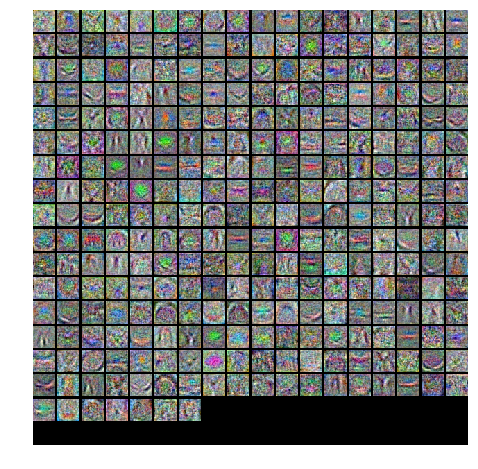

In [375]:
show_net_weights(best_net_hopt2)

In [376]:
def plot_stats(stats):
    # Plot the loss function and train / validation accuracies
    plt.subplot(2, 1, 1)
    plt.plot(stats['loss_history'])
    plt.title('Loss history')
    plt.xlabel('Iteration')
    plt.ylabel('Loss')

    plt.subplot(2, 1, 2)
    plt.plot(stats['train_acc_history'], label='train')
    plt.plot(stats['val_acc_history'], label='val')
    plt.title('Classification accuracy history')
    plt.xlabel('Epoch')
    plt.ylabel('Clasification accuracy')
    plt.legend(loc="best")
    plt.show()
    

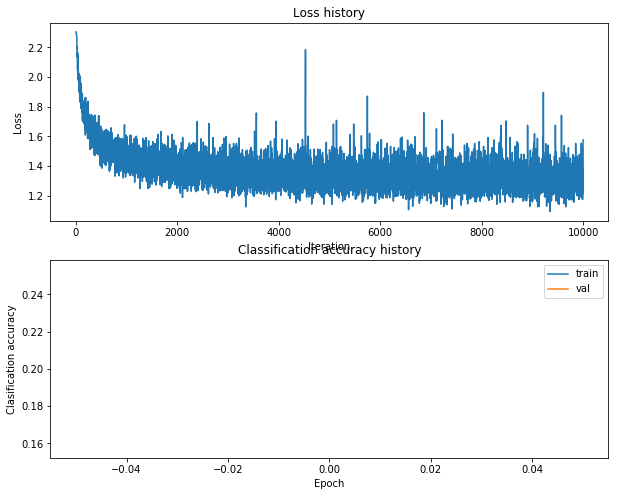

In [380]:
plot_stats(stats_hps_dp2)

In [2]:
%matplotlib inline

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.mlab as mlab
import math

mu = 0.5
variance = 0.007
sigma = math.sqrt(variance)
print(sigma)
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 100)
plt.plot(x,mlab.normpdf(x, mu, sigma))
plt.show()

In [5]:
np.exp(-2*np.log(10))

0.009999999999999995

In [386]:
w1 = best_net_hopt2.params['W1']

In [396]:
 (np.random.rand(*w1.shape) < 0.8 ) / 0.8

array([[1.25, 1.25, 1.25, ..., 1.25, 1.25, 1.25],
       [1.25, 1.25, 0.  , ..., 0.  , 0.  , 1.25],
       [1.25, 1.25, 1.25, ..., 1.25, 1.25, 0.  ],
       ...,
       [0.  , 1.25, 0.  , ..., 1.25, 0.  , 1.25],
       [0.  , 1.25, 1.25, ..., 1.25, 0.  , 1.25],
       [1.25, 1.25, 1.25, ..., 0.  , 1.25, 1.25]])